# FILMATIC

In [2]:
import pandas as pd
import numpy as np


https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

### Clean the data 



In [3]:
df=pd.read_csv('imdb.csv')

In [4]:
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845


#### Splitting genres and removing the [genre] column


In [5]:
df['genres']=df['Genre'].str.split(',')

In [6]:
df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,genres
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,[Drama]
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"[Crime, Drama]"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"[Action, Crime, Drama]"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"[Crime, Drama]"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"[Crime, Drama]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,"[Comedy, Drama, Romance]"
996,Giant,1956,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,"[Drama, Western]"
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"[Drama, Romance, War]"
998,Lifeboat,1944,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,"[Drama, War]"


In [7]:
removing_genre='Genre'

In [8]:
df=df.drop(columns=[removing_genre])


#### Collate 'star' columns into one column

In [9]:
remove_columns=['Star1','Star2','Star3','Star4']

In [10]:
df['Stars']=df.apply(lambda row: f"{row['Star1']} - {row['Star2']}", axis=1)


In [11]:
df.drop(columns=remove_columns, inplace=True)

In [12]:
df

,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,The Shawshank Redemption,1994,142 min,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,2343110,[Drama],Tim Robbins - Morgan Freeman
1,The Godfather,1972,175 min,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1620367,"[Crime, Drama]",Marlon Brando - Al Pacino
2,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2303232,"[Action, Crime, Drama]",Christian Bale - Heath Ledger
3,The Godfather: Part II,1974,202 min,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,1129952,"[Crime, Drama]",Al Pacino - Robert De Niro
4,12 Angry Men,1957,96 min,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,689845,"[Crime, Drama]",Henry Fonda - Lee J. Cobb
...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,7.6,A young New York socialite becomes interested ...,Blake Edwards,166544,"[Comedy, Drama, Romance]",Audrey Hepburn - George Peppard
996,Giant,1956,201 min,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,34075,"[Drama, Western]",Elizabeth Taylor - Rock Hudson
997,From Here to Eternity,1953,118 min,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,43374,"[Drama, Romance, War]",Burt Lancaster - Montgomery Clift
998,Lifeboat,1944,97 min,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,26471,"[Drama, War]",Tallulah Bankhead - John Hodiak


#### Add user id column

In [13]:
user_ids=range(1,1001)

In [14]:
df['user_id']=user_ids

In [15]:
df.insert(0,'user_id', df.pop('user_id'))

In [16]:
df.head()

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,1,The Shawshank Redemption,1994,142 min,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,2343110,[Drama],Tim Robbins - Morgan Freeman
1,2,The Godfather,1972,175 min,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1620367,"[Crime, Drama]",Marlon Brando - Al Pacino
2,3,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2303232,"[Action, Crime, Drama]",Christian Bale - Heath Ledger
3,4,The Godfather: Part II,1974,202 min,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,1129952,"[Crime, Drama]",Al Pacino - Robert De Niro
4,5,12 Angry Men,1957,96 min,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,689845,"[Crime, Drama]",Henry Fonda - Lee J. Cobb


In [17]:
df['user_id']=np.random.randint(1,1001,size=len(df))

In [18]:
df

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,325,The Shawshank Redemption,1994,142 min,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,2343110,[Drama],Tim Robbins - Morgan Freeman
1,566,The Godfather,1972,175 min,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1620367,"[Crime, Drama]",Marlon Brando - Al Pacino
2,188,The Dark Knight,2008,152 min,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2303232,"[Action, Crime, Drama]",Christian Bale - Heath Ledger
3,316,The Godfather: Part II,1974,202 min,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,1129952,"[Crime, Drama]",Al Pacino - Robert De Niro
4,73,12 Angry Men,1957,96 min,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,689845,"[Crime, Drama]",Henry Fonda - Lee J. Cobb
...,...,...,...,...,...,...,...,...,...,...
995,337,Breakfast at Tiffany's,1961,115 min,7.6,A young New York socialite becomes interested ...,Blake Edwards,166544,"[Comedy, Drama, Romance]",Audrey Hepburn - George Peppard
996,452,Giant,1956,201 min,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,34075,"[Drama, Western]",Elizabeth Taylor - Rock Hudson
997,66,From Here to Eternity,1953,118 min,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,43374,"[Drama, Romance, War]",Burt Lancaster - Montgomery Clift
998,397,Lifeboat,1944,97 min,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,26471,"[Drama, War]",Tallulah Bankhead - John Hodiak


In [19]:
df.to_csv('imdb2.csv',index=False)

#### Change Runtime column variables from object to integers

In [20]:
df['Runtime']=df['Runtime'].str.replace(r'\W', "")
df['Runtime']

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object

In [21]:
df['Runtime']=df['Runtime'].str.replace("min", "")
df['Runtime']=df['Runtime'].str.replace(",","")


In [22]:
df['Runtime']=df['Runtime'].astype('object').astype('int64')

In [23]:
df

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,325,The Shawshank Redemption,1994,142,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,2343110,[Drama],Tim Robbins - Morgan Freeman
1,566,The Godfather,1972,175,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1620367,"[Crime, Drama]",Marlon Brando - Al Pacino
2,188,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2303232,"[Action, Crime, Drama]",Christian Bale - Heath Ledger
3,316,The Godfather: Part II,1974,202,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,1129952,"[Crime, Drama]",Al Pacino - Robert De Niro
4,73,12 Angry Men,1957,96,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,689845,"[Crime, Drama]",Henry Fonda - Lee J. Cobb
...,...,...,...,...,...,...,...,...,...,...
995,337,Breakfast at Tiffany's,1961,115,7.6,A young New York socialite becomes interested ...,Blake Edwards,166544,"[Comedy, Drama, Romance]",Audrey Hepburn - George Peppard
996,452,Giant,1956,201,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,34075,"[Drama, Western]",Elizabeth Taylor - Rock Hudson
997,66,From Here to Eternity,1953,118,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,43374,"[Drama, Romance, War]",Burt Lancaster - Montgomery Clift
998,397,Lifeboat,1944,97,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,26471,"[Drama, War]",Tallulah Bankhead - John Hodiak


In [24]:
df.isnull().sum()

user_id          0
Series_Title     0
Released_Year    0
Runtime          0
IMDB_Rating      0
Overview         0
Director         0
No_of_Votes      0
genres           0
Stars            0
dtype: int64

In [25]:
df.dtypes

user_id            int64
Series_Title      object
Released_Year     object
Runtime            int64
IMDB_Rating      float64
Overview          object
Director          object
No_of_Votes        int64
genres            object
Stars             object
dtype: object

In [26]:
df.describe()

,user_id,Runtime,IMDB_Rating,No_of_Votes
count,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,495.87000,122.891000,7.949300,2.736929e+05
std,292.34692,28.093671,0.275491,3.273727e+05
min,1.00000,45.000000,7.600000,2.508800e+04
25%,238.00000,103.000000,7.700000,5.552625e+04
50%,499.50000,119.000000,7.900000,1.385485e+05
75%,749.25000,137.000000,8.100000,3.741612e+05
max,1000.00000,321.000000,9.300000,2.343110e+06


#### Check the average/mean of the ratings and count of the ratings 

In [27]:
no_votes= df[df['No_of_Votes'].notnull()]['No_of_Votes'].astype('int')

In [28]:
imdb_average =df[df['IMDB_Rating'].notnull()]['IMDB_Rating'].astype('int')

In [29]:
voteaverages =imdb_average.mean()

In [30]:
voteaverages

7.468

In [31]:
no_of_votes=no_votes.mean()

In [32]:
no_of_votes

273692.911

#### Genre Statistics, explode the genres into their own rows 

In [33]:
genre_stats=df['genres'].describe()

In [34]:
genre_stats

count        1000
unique        202
top       [Drama]
freq           85
Name: genres, dtype: object

In [35]:
df_genres=df.explode('genres')
df_genres

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,325,The Shawshank Redemption,1994,142,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,2343110,Drama,Tim Robbins - Morgan Freeman
1,566,The Godfather,1972,175,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1620367,Crime,Marlon Brando - Al Pacino
1,566,The Godfather,1972,175,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1620367,Drama,Marlon Brando - Al Pacino
2,188,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2303232,Action,Christian Bale - Heath Ledger
2,188,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2303232,Crime,Christian Bale - Heath Ledger
...,...,...,...,...,...,...,...,...,...,...
998,397,Lifeboat,1944,97,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,26471,Drama,Tallulah Bankhead - John Hodiak
998,397,Lifeboat,1944,97,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,26471,War,Tallulah Bankhead - John Hodiak
999,896,The 39 Steps,1935,86,7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,51853,Crime,Robert Donat - Madeleine Carroll
999,896,The 39 Steps,1935,86,7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,51853,Mystery,Robert Donat - Madeleine Carroll


In [36]:
show_genre_movies='Drama'

In [37]:
drama_movies=df_genres[df_genres['genres'].str.contains(show_genre_movies, case=False, na=False)]

In [38]:
drama_movies

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,325,The Shawshank Redemption,1994,142,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,2343110,Drama,Tim Robbins - Morgan Freeman
1,566,The Godfather,1972,175,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1620367,Drama,Marlon Brando - Al Pacino
2,188,The Dark Knight,2008,152,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,2303232,Drama,Christian Bale - Heath Ledger
3,316,The Godfather: Part II,1974,202,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,1129952,Drama,Al Pacino - Robert De Niro
4,73,12 Angry Men,1957,96,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,689845,Drama,Henry Fonda - Lee J. Cobb
...,...,...,...,...,...,...,...,...,...,...
993,550,Blowup,1966,111,7.6,A fashion photographer unknowingly captures a ...,Michelangelo Antonioni,56513,Drama,David Hemmings - Vanessa Redgrave
995,337,Breakfast at Tiffany's,1961,115,7.6,A young New York socialite becomes interested ...,Blake Edwards,166544,Drama,Audrey Hepburn - George Peppard
996,452,Giant,1956,201,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,34075,Drama,Elizabeth Taylor - Rock Hudson
997,66,From Here to Eternity,1953,118,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,43374,Drama,Burt Lancaster - Montgomery Clift


In [39]:
counts = df_genres['genres'].value_counts(ascending=True)

In [40]:
genrecounts = df_genres['genres'].str.contains('Drama')
drama_count = genrecounts.sum()

print(f'In this dataset there are {drama_count} movies in the drama genre.')

In this dataset there are 724 movies in the drama genre.


In [41]:
genrecounts = df_genres['genres'].str.contains('Comedy')
Comedy_count = genrecounts.sum()

print(f'In this dataset there are {Comedy_count} movies in the comedy genre.')

In this dataset there are 233 movies in the comedy genre.


In [42]:
genrecounts = df_genres['genres'].str.contains('Action')
action_count = genrecounts.sum()

print(f'In this dataset there are {action_count} movies in the action genre.')

In this dataset there are 189 movies in the action genre.


In [43]:
genrecounts = df_genres['genres'].str.contains('Romance')
romance_count = genrecounts.sum()

print(f'In this dataset there are {romance_count} movies in the romance genre.')

In this dataset there are 125 movies in the romance genre.


In [44]:
genrecounts = df_genres['genres'].str.contains('Thriller')
thriller_count = genrecounts.sum()

print(f'In this dataset there are {thriller_count} movies in the thriller genre.')

In this dataset there are 137 movies in the thriller genre.


### Data Visualisation

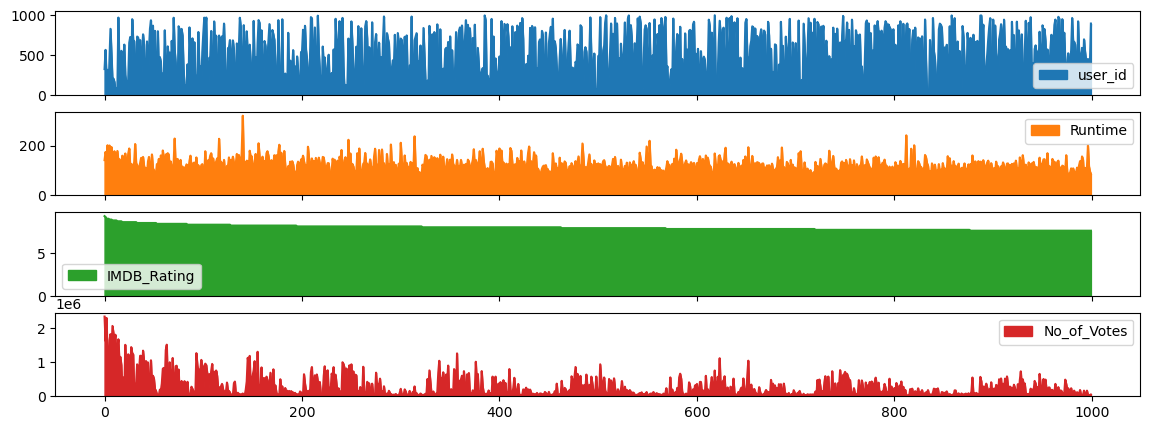

In [45]:
axs = df.plot.area(figsize=(14,5), subplots = True)


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
imdb_column='IMDB_Rating'
rating_column='No_of_Votes'

Text(0.5, 1.0, 'Changes of ratings within the dataset')

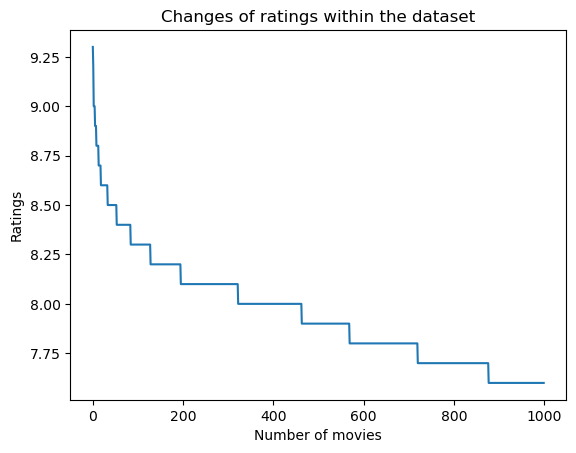

In [48]:
plt.plot(df[imdb_column],label='IMDB_Rating', linestyle='-')

plt.xlabel('Number of movies')
plt.ylabel('Ratings')
plt.title('Changes of ratings within the dataset')


Text(0.5, 1.0, 'Amount of movies released throughout the decades')

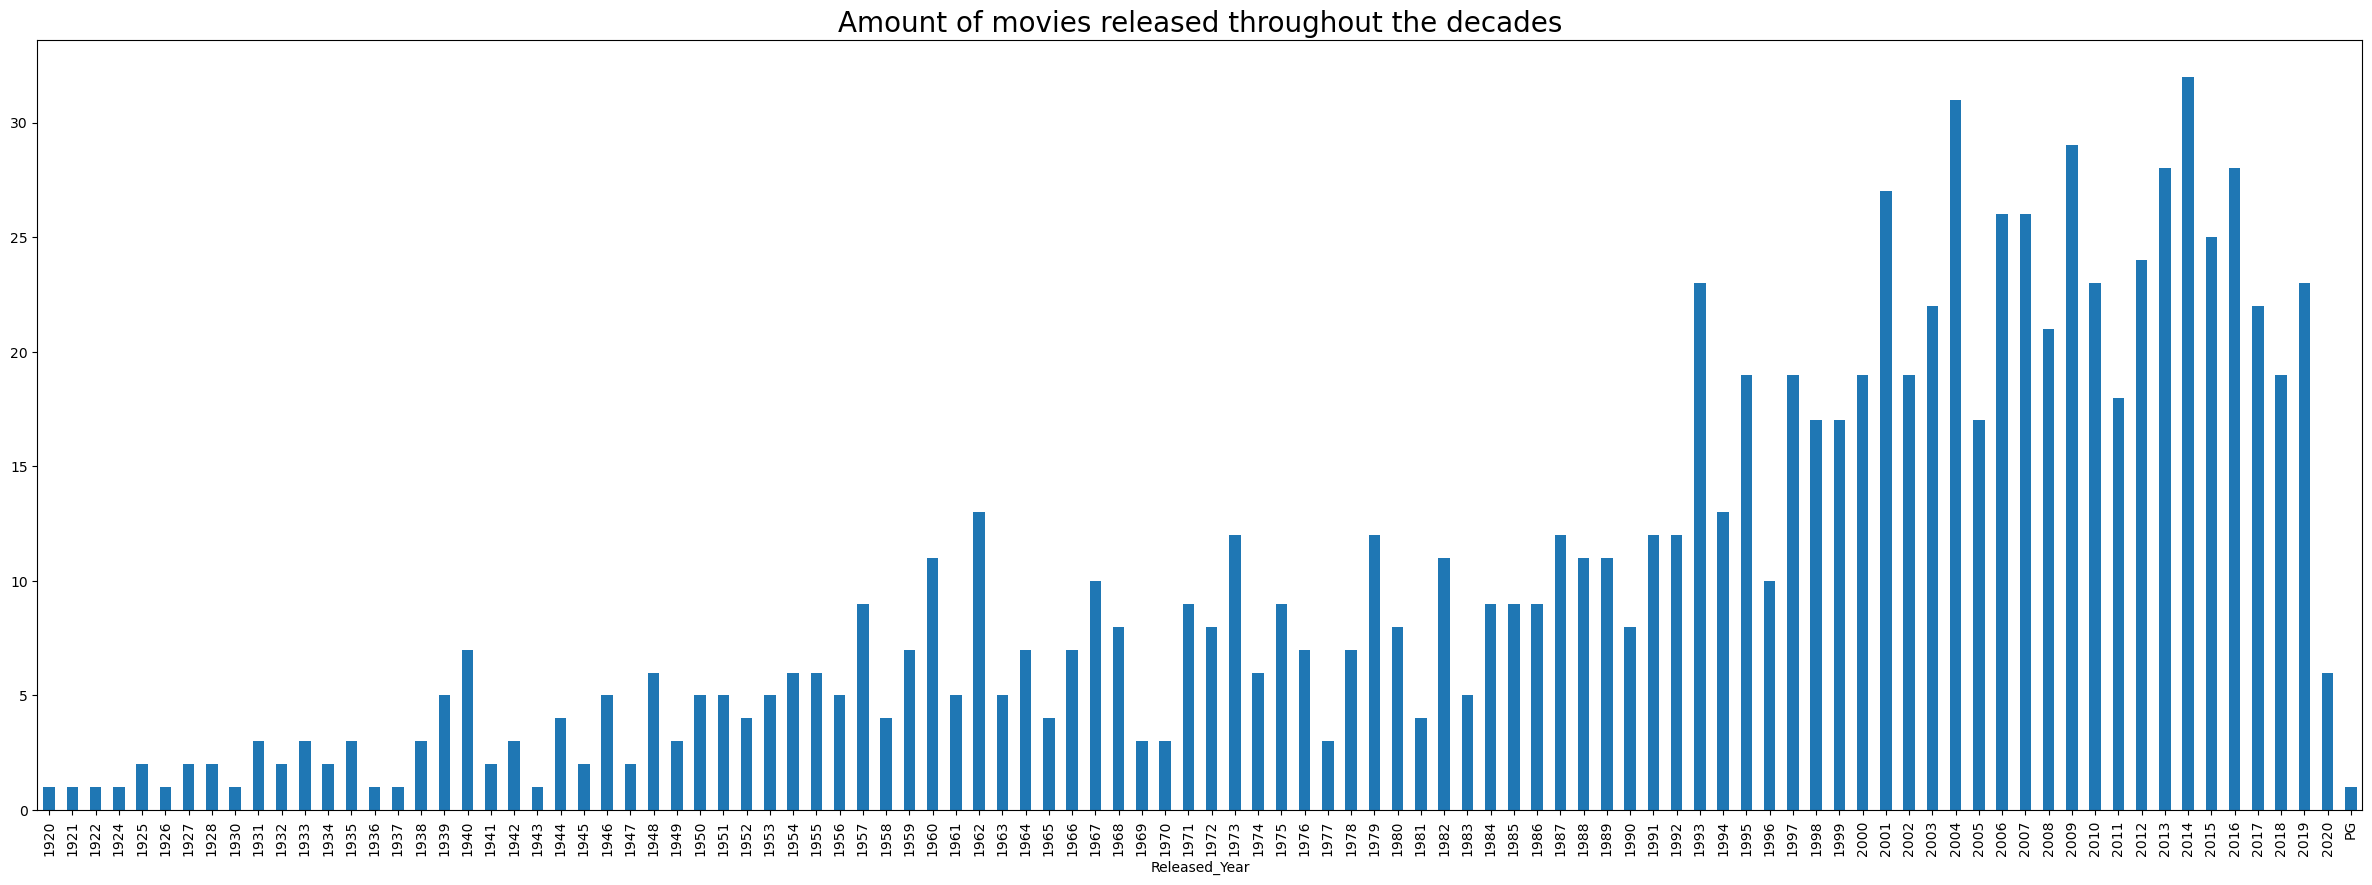

In [49]:
fig,ax=plt.subplots(figsize=(30,10))
df.groupby('Released_Year').count()['Series_Title'].plot(kind='bar')
plt.title("Amount of movies released throughout the decades", fontsize=20)



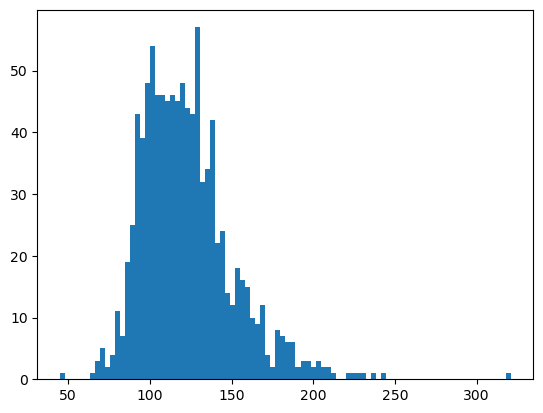

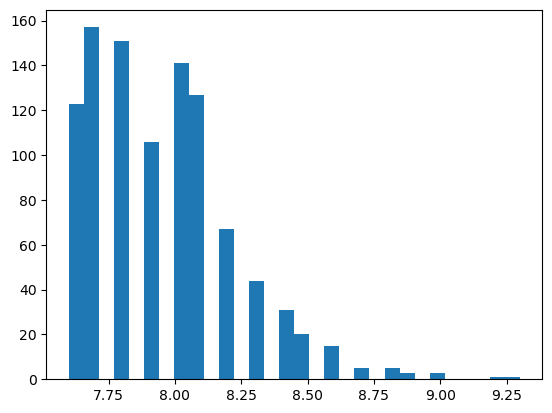

In [50]:
plt.hist(df['Runtime'],bins=90)
plt.show()
plt.hist(df['IMDB_Rating'],bins=30)
plt.show()



        

### Create recommendation systems

In [51]:

import nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer




In [52]:
df['Series_Title']=df['Series_Title'].str.lower()

In [53]:
df['Overview']=df['Overview'].str.lower()

In [54]:
df['Released_Year']=df['Released_Year'].str.lower()

In [55]:
df['Stars']=df['Stars'].str.lower()

In [56]:
df['Director']=df['Director'].str.lower()


In [57]:
df_copy2=df.copy()
df_copy2

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,325,the shawshank redemption,1994,142,9.3,two imprisoned men bond over a number of years...,frank darabont,2343110,[Drama],tim robbins - morgan freeman
1,566,the godfather,1972,175,9.2,an organized crime dynasty's aging patriarch t...,francis ford coppola,1620367,"[Crime, Drama]",marlon brando - al pacino
2,188,the dark knight,2008,152,9.0,when the menace known as the joker wreaks havo...,christopher nolan,2303232,"[Action, Crime, Drama]",christian bale - heath ledger
3,316,the godfather: part ii,1974,202,9.0,the early life and career of vito corleone in ...,francis ford coppola,1129952,"[Crime, Drama]",al pacino - robert de niro
4,73,12 angry men,1957,96,9.0,a jury holdout attempts to prevent a miscarria...,sidney lumet,689845,"[Crime, Drama]",henry fonda - lee j. cobb
...,...,...,...,...,...,...,...,...,...,...
995,337,breakfast at tiffany's,1961,115,7.6,a young new york socialite becomes interested ...,blake edwards,166544,"[Comedy, Drama, Romance]",audrey hepburn - george peppard
996,452,giant,1956,201,7.6,sprawling epic covering the life of a texas ca...,george stevens,34075,"[Drama, Western]",elizabeth taylor - rock hudson
997,66,from here to eternity,1953,118,7.6,"in hawaii in 1941, a private is cruelly punish...",fred zinnemann,43374,"[Drama, Romance, War]",burt lancaster - montgomery clift
998,397,lifeboat,1944,97,7.6,several survivors of a torpedoed merchant ship...,alfred hitchcock,26471,"[Drama, War]",tallulah bankhead - john hodiak


In [58]:
df2=df_copy2.drop(['genres','Overview', 'Stars', 'Director'],axis=1)

In [59]:
df2

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,No_of_Votes
0,325,the shawshank redemption,1994,142,9.3,2343110
1,566,the godfather,1972,175,9.2,1620367
2,188,the dark knight,2008,152,9.0,2303232
3,316,the godfather: part ii,1974,202,9.0,1129952
4,73,12 angry men,1957,96,9.0,689845
...,...,...,...,...,...,...
995,337,breakfast at tiffany's,1961,115,7.6,166544
996,452,giant,1956,201,7.6,34075
997,66,from here to eternity,1953,118,7.6,43374
998,397,lifeboat,1944,97,7.6,26471


###  Simple content-based recommender system

In [60]:
df2['datastrings']=df2[df2.columns[1:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)
print(df2['datastrings'].head())

0    the shawshank redemption19941429.32343110
1               the godfather19721759.21620367
2             the dark knight20081529.02303232
3      the godfather: part ii19742029.01129952
4                  12 angry men1957969.0689845
Name: datastrings, dtype: object


In [61]:
vectorizer=CountVectorizer()
vectorized=vectorizer.fit_transform(df2['datastrings'])

In [62]:
vectorized

<1000x2929 sparse matrix of type '<class 'numpy.int64'>'
	with 3716 stored elements in Compressed Sparse Row format>

In [63]:
similarities=cosine_similarity(vectorized)

In [64]:
print(similarities)

[[1.         0.28867513 0.25       ... 0.         0.         0.25      ]
 [0.28867513 1.         0.28867513 ... 0.         0.         0.28867513]
 [0.25       0.28867513 1.         ... 0.         0.         0.25      ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.25       0.28867513 0.25       ... 0.         0.         1.        ]]


In [65]:
vectorizer= TfidfVectorizer(ngram_range=(1,2))

# The ngram range is important to the functioning of the system, as it focuses on the composition of more than one word

In [66]:
df=pd.DataFrame(similarities,columns=df_copy2['Series_Title'],index=df_copy2['Series_Title']).reset_index()

df.head()

Series_Title,Series_Title,the shawshank redemption,the godfather,the dark knight,the godfather: part ii,12 angry men,the lord of the rings: the return of the king,pulp fiction,schindler's list,inception,...,giù la testa,kelly's heroes,the jungle book,blowup,a hard day's night,breakfast at tiffany's,giant,from here to eternity,lifeboat,the 39 steps
0,the shawshank redemption,1.000000,0.288675,0.250000,0.223607,0.0,0.400000,0.0,0.0,0.0,...,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
1,the godfather,0.288675,1.000000,0.288675,0.258199,0.0,0.461880,0.0,0.0,0.0,...,0.0,0.0,0.288675,0.0,0.0,0.0,0.0,0.0,0.0,0.288675
2,the dark knight,0.250000,0.288675,1.000000,0.223607,0.0,0.400000,0.0,0.0,0.0,...,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000
3,the godfather: part ii,0.223607,0.258199,0.223607,1.000000,0.0,0.357771,0.0,0.0,0.0,...,0.0,0.0,0.223607,0.0,0.0,0.0,0.0,0.0,0.0,0.223607
4,12 angry men,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [67]:
movie_example_input='toy story'
movie_recommendation=pd.DataFrame(df.nlargest(4,movie_example_input)['Series_Title'])
recommendations=movie_recommendation[movie_recommendation['Series_Title']!=movie_example_input]
print(recommendations)

    Series_Title
151  toy story 3
516  toy story 2
596  toy story 4


### Genre content-based recommendation engine

In [68]:
df3=df_copy2.copy()

In [69]:
df3

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,325,the shawshank redemption,1994,142,9.3,two imprisoned men bond over a number of years...,frank darabont,2343110,[Drama],tim robbins - morgan freeman
1,566,the godfather,1972,175,9.2,an organized crime dynasty's aging patriarch t...,francis ford coppola,1620367,"[Crime, Drama]",marlon brando - al pacino
2,188,the dark knight,2008,152,9.0,when the menace known as the joker wreaks havo...,christopher nolan,2303232,"[Action, Crime, Drama]",christian bale - heath ledger
3,316,the godfather: part ii,1974,202,9.0,the early life and career of vito corleone in ...,francis ford coppola,1129952,"[Crime, Drama]",al pacino - robert de niro
4,73,12 angry men,1957,96,9.0,a jury holdout attempts to prevent a miscarria...,sidney lumet,689845,"[Crime, Drama]",henry fonda - lee j. cobb
...,...,...,...,...,...,...,...,...,...,...
995,337,breakfast at tiffany's,1961,115,7.6,a young new york socialite becomes interested ...,blake edwards,166544,"[Comedy, Drama, Romance]",audrey hepburn - george peppard
996,452,giant,1956,201,7.6,sprawling epic covering the life of a texas ca...,george stevens,34075,"[Drama, Western]",elizabeth taylor - rock hudson
997,66,from here to eternity,1953,118,7.6,"in hawaii in 1941, a private is cruelly punish...",fred zinnemann,43374,"[Drama, Romance, War]",burt lancaster - montgomery clift
998,397,lifeboat,1944,97,7.6,several survivors of a torpedoed merchant ship...,alfred hitchcock,26471,"[Drama, War]",tallulah bankhead - john hodiak


In [70]:
df_genres['genres']=df_genres['genres'].str.replace('Sci-Fi','SciFi')
df_genres['genres']=df_genres['genres'].str.replace('Film-noir','Noir')

In [71]:
tfidf_vector=TfidfVectorizer(stop_words='english')


In [72]:
tfidf_matrix=tfidf_vector.fit_transform(df_genres['genres'])

In [73]:
print(list(enumerate(tfidf_vector.get_feature_names_out())))

[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'biography'), (4, 'comedy'), (5, 'crime'), (6, 'drama'), (7, 'family'), (8, 'fantasy'), (9, 'film'), (10, 'history'), (11, 'horror'), (12, 'music'), (13, 'musical'), (14, 'mystery'), (15, 'noir'), (16, 'romance'), (17, 'scifi'), (18, 'sport'), (19, 'thriller'), (20, 'war'), (21, 'western')]


In [74]:
print(tfidf_matrix[:5])

  (0, 6)	1.0
  (1, 5)	1.0
  (2, 6)	1.0
  (3, 0)	1.0
  (4, 5)	1.0


In [75]:
similarities2=linear_kernel(tfidf_matrix,tfidf_matrix)
print(similarities2)

[[1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [76]:
from fuzzywuzzy import fuzz


/Users/jessicafrank/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [77]:
def matching_score(a,b):
    return fuzz.ratio(a,b)

In [78]:
def get_title_year_from_index(index):
    return df_genres[df_genres.index==index]['Series_Title'].values[0]

def get_title_from_index(index):
    return df_genres[df_genres.index==index]['Series_Title'].values[0]


def get_index_from_title(title):
    return df_genres[df_genres==title].index.values[0]
    

In [79]:
def search_titles(title):
    leven_scores = list(enumerate(df_genres['Series_Title'].apply(matching_score, b=title)))
    sorted_leven_scores=sorted(leven_scores,key=lambda x: x[1],reverse=True)
    closest_title=get_title_from_index(sorted_leven_scores[0][0])
    distance_score=sorted_leven_scores[0][1]
    return closest_title, distance_score

In [80]:
def recs_based_on_genre(movie_likes, how_many):
    
    closest_title, distance_score =search_titles(movie_likes)
    
    if distance_score ==100:
        film_index=get_index_from_title(closest_title)
        film_list=list(enumerate(similarities2[int(film_index)]))
        similar_films=list(filter(lambda x:x[0] != int(film_index), sorted(film_list,key=lambda x:x[1], reverse=True)))

        print('Here are the list of films similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')

        for i, s in similar_films[:how_many]:
            print(get_title_year_from_index(i))


    else:
        print('You have mispelled your title, did you mean '+'\033[1m'+str(closest_title)+'\033[0m'+'?','\n')

        
        film_index=get_index_from_title(closest_title)
        film_list=list(enumerate(similarities2[int(film_index)]))
        similar_films=list(filter(lambda x:x[0] != int(film_index), sorted(film_list,key=lambda x:x[1], reverse=True)))
        
        print('Here are the list of films similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')


        for i, s in similar_films[:how_many]:
            print(get_title_year_from_index(i))



In [81]:
recs_based_on_genre('the dark knight',20)

You have mispelled your title, did you mean The Godfather: Part II? 

Here are the list of films similar to The Godfather: Part II.

The Dark Knight
The Lord of the Rings: The Return of the King
Schindler's List
Fight Club
Il buono, il brutto, il cattivo
The Matrix
Star Wars: Episode V - The Empire Strikes Back
Interstellar
Saving Private Ryan
The Green Mile
Seppuku
The Intouchables
Gladiator
The Usual Suspects
Terminator 2: Judgment Day
Hotaru no haka
Once Upon a Time in the West
Modern Times
Vikram Vedha
Spider-Man: Into the Spider-Verse


### Content based recommender combining qualitative and quantitative values

In [82]:
df3

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars
0,325,the shawshank redemption,1994,142,9.3,two imprisoned men bond over a number of years...,frank darabont,2343110,[Drama],tim robbins - morgan freeman
1,566,the godfather,1972,175,9.2,an organized crime dynasty's aging patriarch t...,francis ford coppola,1620367,"[Crime, Drama]",marlon brando - al pacino
2,188,the dark knight,2008,152,9.0,when the menace known as the joker wreaks havo...,christopher nolan,2303232,"[Action, Crime, Drama]",christian bale - heath ledger
3,316,the godfather: part ii,1974,202,9.0,the early life and career of vito corleone in ...,francis ford coppola,1129952,"[Crime, Drama]",al pacino - robert de niro
4,73,12 angry men,1957,96,9.0,a jury holdout attempts to prevent a miscarria...,sidney lumet,689845,"[Crime, Drama]",henry fonda - lee j. cobb
...,...,...,...,...,...,...,...,...,...,...
995,337,breakfast at tiffany's,1961,115,7.6,a young new york socialite becomes interested ...,blake edwards,166544,"[Comedy, Drama, Romance]",audrey hepburn - george peppard
996,452,giant,1956,201,7.6,sprawling epic covering the life of a texas ca...,george stevens,34075,"[Drama, Western]",elizabeth taylor - rock hudson
997,66,from here to eternity,1953,118,7.6,"in hawaii in 1941, a private is cruelly punish...",fred zinnemann,43374,"[Drama, Romance, War]",burt lancaster - montgomery clift
998,397,lifeboat,1944,97,7.6,several survivors of a torpedoed merchant ship...,alfred hitchcock,26471,"[Drama, War]",tallulah bankhead - john hodiak


In [83]:
df3['combined_columns']=df3['Overview']+['IMDB_Rating']

In [84]:
tfidf_vectorizer1=TfidfVectorizer(stop_words='english')

In [85]:
tfidf_matrix1=tfidf_vectorizer1.fit_transform(df3['combined_columns'].values.astype('U'))

In [86]:
cosine_sim1=linear_kernel(tfidf_matrix1,tfidf_matrix1)

In [87]:
tfidf_matrix1.shape

(1000, 5429)

In [88]:
def recs(title, cosine_sim1=cosine_sim1):
    idx=df3.index[df3['Series_Title']==title].tolist()[0]
    sim_scores=list(enumerate(cosine_sim1[idx]))
    sim_scores=sorted(sim_scores,key=lambda x: x[1], reverse=True)
    sim_scores=sim_scores[1:11]
    movie_indices=[i[0] for i in sim_scores]
    return df3['Series_Title'].iloc[movie_indices].tolist()

In [89]:
recs('goodfellas')

['green book',
 'pulp fiction',
 'donnie brasco',
 'giant',
 'batman: mask of the phantasm',
 'le passé',
 'road to perdition',
 'the godfather: part ii',
 'scarface: the shame of the nation',
 'eastern promises']

### Collaborative Filtering recommendation engine

In [90]:
movies=pd.read_csv("imdb2.csv")

In [91]:
df4=movies.loc[:,['user_id','IMDB_Rating','Series_Title','No_of_Votes']]

In [92]:
df4

,user_id,IMDB_Rating,Series_Title,No_of_Votes
0,325,9.3,The Shawshank Redemption,2343110
1,566,9.2,The Godfather,1620367
2,188,9.0,The Dark Knight,2303232
3,316,9.0,The Godfather: Part II,1129952
4,73,9.0,12 Angry Men,689845
...,...,...,...,...
995,337,7.6,Breakfast at Tiffany's,166544
996,452,7.6,Giant,34075
997,66,7.6,From Here to Eternity,43374
998,397,7.6,Lifeboat,26471


In [93]:
users_movie_matrix=pd.pivot_table(df4,columns='Series_Title',index='user_id',values='No_of_Votes')
users_movie_matrix

Series_Title,(500) Days of Summer,12 Angry Men,12 Years a Slave,1917,2001: A Space Odyssey,21 Grams,25th Hour,28 Days Later...,3 Idiots,300,...,Zelig,Zerkalo,Zindagi Na Milegi Dobara,Zodiac,Zombieland,Zootopia,Zulu,Zwartboek,À bout de souffle,Ôkami kodomo no Ame to Yuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
toy_story_rating=users_movie_matrix["Toy Story"]
toystory_corr=users_movie_matrix.corrwith(toy_story_rating)
corr_df=pd.DataFrame(toystory_corr,columns=['Correlation'])
corr_df=corr_df.join(df4['No_of_Votes'])
similar_movies=corr_df[corr_df['No_of_Votes']>500].sort_values(['Correlation'],ascending=False)
similar_movies


/Users/jessicafrank/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/jessicafrank/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation,No_of_Votes
Series_Title,,


### Charts constructed on the basis of the top movies, through weighted rating(WR)

In [95]:
# Whilst this is not a functioning recommender system, this interprets collaborative filtering as it focalises user ratings

In [96]:
voteaverages

7.468

In [97]:
va=voteaverages
va

7.468

In [98]:
no_of_votes

273692.911

In [99]:
v_quantile=no_votes.quantile(0.50)

In [100]:
v_quantile

138548.5

In [101]:
qualified_movies=movies[(movies['No_of_Votes']>=v_quantile) & (movies['No_of_Votes'].notnull() & (movies['IMDB_Rating'].notnull()))]
[['Series_Title','Released_Year','No_of_Votes','IMDB_Rating','genres']]
                                                                                

[['Series_Title', 'Released_Year', 'No_of_Votes', 'IMDB_Rating', 'genres']]

In [102]:
qualified_movies['No_of_Votes']=qualified_movies['No_of_Votes'].astype('int')
qualified_movies['IMDB_Rating']=qualified_movies['IMDB_Rating'].astype('int')
qualified_movies.shape
pd.options.mode.chained_assignment = None  # default='warn'

/var/folders/db/42hfs6_95ng4bd021p93yvnr0000gn/T/ipykernel_90127/4010293939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_movies['No_of_Votes']=qualified_movies['No_of_Votes'].astype('int')
/var/folders/db/42hfs6_95ng4bd021p93yvnr0000gn/T/ipykernel_90127/4010293939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_movies['IMDB_Rating']=qualified_movies['IMDB_Rating'].astype('int')


In [103]:
def averagely_weighted_rating(x):
    v=x['No_of_Votes']
    R=x['IMDB_Rating']
    return (v/(v+v_quantile) * R) + (v_quantile/(v_quantile+v) * va)

In [104]:
qualified_movies['wr']=qualified_movies.apply(averagely_weighted_rating, axis=1)
pd.options.mode.chained_assignment = None  # default='warn'

In [105]:
qualified_movies=qualified_movies.sort_values('wr', ascending=False).head(250)

In [106]:
qualified_movies.head(15)

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars,wr
0,325,The Shawshank Redemption,1994,142 min,9,Two imprisoned men bond over a number of years...,Frank Darabont,2343110,['Drama'],Tim Robbins - Morgan Freeman,8.914470
2,188,The Dark Knight,2008,152 min,9,When the menace known as the Joker wreaks havo...,Christopher Nolan,2303232,"['Action', ' Crime', ' Drama']",Christian Bale - Heath Ledger,8.913073
1,566,The Godfather,1972,175 min,9,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,1620367,"['Crime', ' Drama']",Marlon Brando - Al Pacino,8.879325
3,316,The Godfather: Part II,1974,202 min,9,The early life and career of Vito Corleone in ...,Francis Ford Coppola,1129952,"['Crime', ' Drama']",Al Pacino - Robert De Niro,8.832671
4,73,12 Angry Men,1957,96 min,9,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,689845,"['Crime', ' Drama']",Henry Fonda - Lee J. Cobb,8.743774
8,187,Inception,2010,148 min,8,A thief who steals corporate secrets through t...,Christopher Nolan,2067042,"['Action', ' Adventure', ' Sci-Fi']",Leonardo DiCaprio - Joseph Gordon-Levitt,7.966581
9,206,Fight Club,1999,139 min,8,An insomniac office worker and a devil-may-car...,David Fincher,1854740,['Drama'],Brad Pitt - Edward Norton,7.963022
6,830,Pulp Fiction,1994,154 min,8,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,1826188,"['Crime', ' Drama']",John Travolta - Uma Thurman,7.962485
11,59,Forrest Gump,1994,142 min,8,"The presidencies of Kennedy and Johnson, the e...",Robert Zemeckis,1809221,"['Drama', ' Romance']",Tom Hanks - Robin Wright,7.962158
14,971,The Matrix,1999,136 min,8,When a beautiful stranger leads computer hacke...,Lana Wachowski,1676426,"['Action', ' Sci-Fi']",Lilly Wachowski - Keanu Reeves,7.959389


In [107]:
qualified_movies.tail(15)

,user_id,Series_Title,Released_Year,Runtime,IMDB_Rating,Overview,Director,No_of_Votes,genres,Stars,wr
229,239,Mary and Max,2009,92 min,8,A tale of friendship between two unlikely pen ...,Adam Elliot,164462,"['Animation', ' Comedy', ' Drama']",Toni Collette - Philip Seymour Hoffman,7.756748
117,117,The Apartment,1960,125 min,8,A man tries to rise in his company by letting ...,Billy Wilder,164363,"['Comedy', ' Drama', ' Romance']",Jack Lemmon - Shirley MacLaine,7.756669
207,214,PK,2014,153 min,8,An alien on Earth loses the only device he can...,Rajkumar Hirani,163061,"['Comedy', ' Drama', ' Musical']",Aamir Khan - Anushka Sharma,7.755618
288,649,Cool Hand Luke,1967,127 min,8,A laid back Southern man is sentenced to two y...,Stuart Rosenberg,161984,"['Crime', ' Drama']",Paul Newman - George Kennedy,7.754743
126,596,Metropolis,1927,153 min,8,In a futuristic city sharply divided between t...,Fritz Lang,159992,"['Drama', ' Sci-Fi']",Brigitte Helm - Alfred Abel,7.753106
205,455,Soul,2020,100 min,8,"After landing the gig of a lifetime, a New Yor...",Pete Docter,159171,"['Animation', ' Adventure', ' Comedy']",Kemp Powers - Jamie Foxx,7.752425
309,369,The Third Man,1949,104 min,8,Pulp novelist Holly Martins travels to shadowy...,Carol Reed,158731,"['Film-Noir', ' Mystery', ' Thriller']",Orson Welles - Joseph Cotten,7.752059
187,143,Dial M for Murder,1954,105 min,8,A former tennis player tries to arrange his wi...,Alfred Hitchcock,158335,"['Crime', ' Thriller']",Ray Milland - Grace Kelly,7.751728
263,359,In the Name of the Father,1993,133 min,8,A man's coerced confession to an I.R.A. bombin...,Jim Sheridan,156842,"['Biography', ' Crime', ' Drama']",Daniel Day-Lewis - Pete Postlethwaite,7.750473
57,416,Dangal,2016,161 min,8,Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,156479,"['Action', ' Biography', ' Drama']",Aamir Khan - Sakshi Tanwar,7.750166


### Random sampling of popular films

In [108]:
random_film=qualified_movies.sample(n=1)

In [109]:
print(random_film[['Series_Title','genres']])

             Series_Title                 genres
45  Nuovo Cinema Paradiso  ['Drama', ' Romance']


In [110]:
specific_genre='Drama'

In [111]:
random_genre_film=qualified_movies[qualified_movies['genres'].str.contains(specific_genre)]

In [112]:
random_drama_film=random_genre_film.sample(n=10)
print(pd.DataFrame(random_drama_film[['Series_Title','Runtime','Released_Year','Overview']]))


                  Series_Title  Runtime Released_Year  \
263  In the Name of the Father  133 min          1993   
429         The Sound of Music  172 min          1965   
27                       Se7en  127 min          1995   
98             American Beauty  122 min          1999   
267                Stand by Me   89 min          1986   
225                Gran Torino  116 min          2008   
243        Catch Me If You Can  141 min          2002   
150            Pan's Labyrinth  118 min          2006   
131                 Green Book  130 min          2018   
244              Amores perros  154 min          2000   

                                              Overview  
263  A man's coerced confession to an I.R.A. bombin...  
429  A woman leaves an Austrian convent to become a...  
27   Two detectives, a rookie and a veteran, hunt a...  
98   A sexually frustrated suburban father has a mi...  
267  After the death of one of his friends, a write...  
225  Disgruntled Korean War ve

In [113]:
data_random_frame=pd.DataFrame({
    'Series Title':random_drama_film['Series_Title'].values,
    'Released Year':random_drama_film['Released_Year'].values,
    'Genre':random_drama_film['genres'].values,
    'Overview':random_drama_film['Overview'].values,
    'Runtime':random_drama_film['Runtime'].values,
    'Rating':random_drama_film['IMDB_Rating'].values,
    'Stars':random_drama_film['Stars'].values
})

In [114]:
data_random_frame

,Series Title,Released Year,Genre,Overview,Runtime,Rating,Stars
0,In the Name of the Father,1993,"['Biography', ' Crime', ' Drama']",A man's coerced confession to an I.R.A. bombin...,133 min,8,Daniel Day-Lewis - Pete Postlethwaite
1,The Sound of Music,1965,"['Biography', ' Drama', ' Family']",A woman leaves an Austrian convent to become a...,172 min,8,Julie Andrews - Christopher Plummer
2,Se7en,1995,"['Crime', ' Drama', ' Mystery']","Two detectives, a rookie and a veteran, hunt a...",127 min,8,Morgan Freeman - Brad Pitt
3,American Beauty,1999,['Drama'],A sexually frustrated suburban father has a mi...,122 min,8,Kevin Spacey - Annette Bening
4,Stand by Me,1986,"['Adventure', ' Drama']","After the death of one of his friends, a write...",89 min,8,Wil Wheaton - River Phoenix
5,Gran Torino,2008,['Drama'],Disgruntled Korean War veteran Walt Kowalski s...,116 min,8,Clint Eastwood - Bee Vang
6,Catch Me If You Can,2002,"['Biography', ' Crime', ' Drama']","Barely 21 yet, Frank is a skilled forger who h...",141 min,8,Leonardo DiCaprio - Tom Hanks
7,Pan's Labyrinth,2006,"['Drama', ' Fantasy', ' War']","In the Falangist Spain of 1944, the bookish yo...",118 min,8,Ivana Baquero - Ariadna Gil
8,Green Book,2018,"['Biography', ' Comedy', ' Drama']",A working-class Italian-American bouncer becom...,130 min,8,Viggo Mortensen - Mahershala Ali
9,Amores perros,2000,"['Drama', ' Thriller']",A horrific car accident connects three stories...,154 min,8,Emilio Echevarría - Gael García Bernal


In [115]:
specified_director= 'Stanley Kubrick'

In [116]:
specified_director=qualified_movies[qualified_movies['Director']==specified_director]

In [117]:
print(specified_director[['Series_Title']])

                                          Series_Title
73                                         The Shining
113                                 A Clockwork Orange
104                                  Full Metal Jacket
114                              2001: A Space Odyssey
78   Dr. Strangelove or: How I Learned to Stop Worr...
80                                      Paths of Glory


In [118]:
unique_directors = qualified_movies['Director'].unique()
unique_directors

array(['Frank Darabont', 'Christopher Nolan', 'Francis Ford Coppola',
       'Sidney Lumet', 'David Fincher', 'Quentin Tarantino',
       'Robert Zemeckis', 'Lana Wachowski', 'Peter Jackson',
       'Ridley Scott', 'Jonathan Demme', 'Joss Whedon',
       'Steven Spielberg', 'George Lucas', 'Martin Scorsese',
       'Irvin Kershner', 'Sam Mendes', 'James Gunn', 'Luc Besson',
       'Tony Kaye', 'James McTeigue', 'Gore Verbinski', 'Andrew Stanton',
       'James Cameron', 'Bryan Singer', 'Mel Gibson', 'Richard Marquand',
       'Roger Allers', 'Peter Weir', 'Todd Phillips', 'Pete Docter',
       'Milos Forman', 'Michel Gondry', 'M. Night Shyamalan',
       'Tim Miller', 'Stanley Kubrick', 'John Lasseter', 'George Miller',
       'Gus Van Sant', 'Ethan Coen', 'Ron Howard', 'Anthony Russo',
       'Danny Boyle', 'John McTiernan', 'Guy Ritchie', 'Darren Aronofsky',
       'David Yates', 'Olivier Nakache', 'Lee Unkrich', 'Brian De Palma',
       'Richard Kelly', 'Frank Miller', 'Joel Coen', 